# Proyek Analisis Data: Bike-sharing
- **Nama:** Robertos Hartanto Wijaya
- **Email:** m245d4ky2742@bangkit.academy
- **ID Dicoding:** robertos

## Menentukan Pertanyaan Bisnis

- Apakah ada perbedaan pola peminjaman sepeda antara hari kerja dan hari libur?
- Apakah cuaca memengaruhi jumlah peminjaman sepeda?
- Bagaimana perbandingan rata-rata jumlah peminjaman sepeda antara pengguna casual dan pengguna terdaftar pada setiap hari kerja (Senin-Jumat)?


## Dataset

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Semua Packages/Library yang Digunakan

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Load tabel day

In [104]:
day_df = pd.read_csv("/content/drive/MyDrive/datasets/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Load tabel hour



In [105]:
hour_df = pd.read_csv("/content/drive/MyDrive/datasets/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Data day_df

#### Terdapat kesalahan type data pada dteday

In [106]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### Tidak ada missing value pada data day

In [107]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Tidak terdapat duplicate value pada data day

In [108]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [109]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai data hours_df

#### Terdapat kesalahan type data dteday dari data hour

In [110]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### Tidak terdapat missing value dari data hour

In [111]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Tidak terdapat duplicate value dari data hour

In [112]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [113]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Mengubah data dteday dari object ke datetime pada data day

In [114]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Mengubah data dteday dari object ke datetime pada data hour

In [115]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore data day



#### Melihat sample 5 data dari day

In [116]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
30,31,2011-01-31,1,0,1,0,1,1,2,0.180833,0.186250,0.603750,0.187192,42,1459,1501
543,544,2012-06-27,3,1,6,0,3,1,1,0.697500,0.640792,0.360000,0.271775,1077,6258,7335
622,623,2012-09-14,3,1,9,0,5,1,1,0.633333,0.594083,0.672500,0.103863,1379,6630,8009
74,75,2011-03-16,1,0,3,0,3,1,2,0.365217,0.366930,0.776522,0.203117,321,1871,2192
20,21,2011-01-21,1,0,1,0,5,1,1,0.177500,0.157833,0.457083,0.353242,75,1468,1543


#### Mengeksplore parameter statistik dari data day

In [117]:
day_df.describe(include="all")

<ipython-input-117-51e59b52191b>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


#### Mengeksplore persebaran dari casual user dari data day

In [118]:
day_df.groupby(by="casual").instant.nunique().sort_values(ascending=False)

casual
968     4
120     4
639     3
653     3
140     3
       ..
551     1
550     1
548     1
547     1
3410    1
Name: instant, Length: 606, dtype: int64

#### Memeriksa kolom instant unique/tidak

In [119]:
day_df.instant.is_unique

True

#### Menampilkan distribusi variabel numerik dengan histogram.

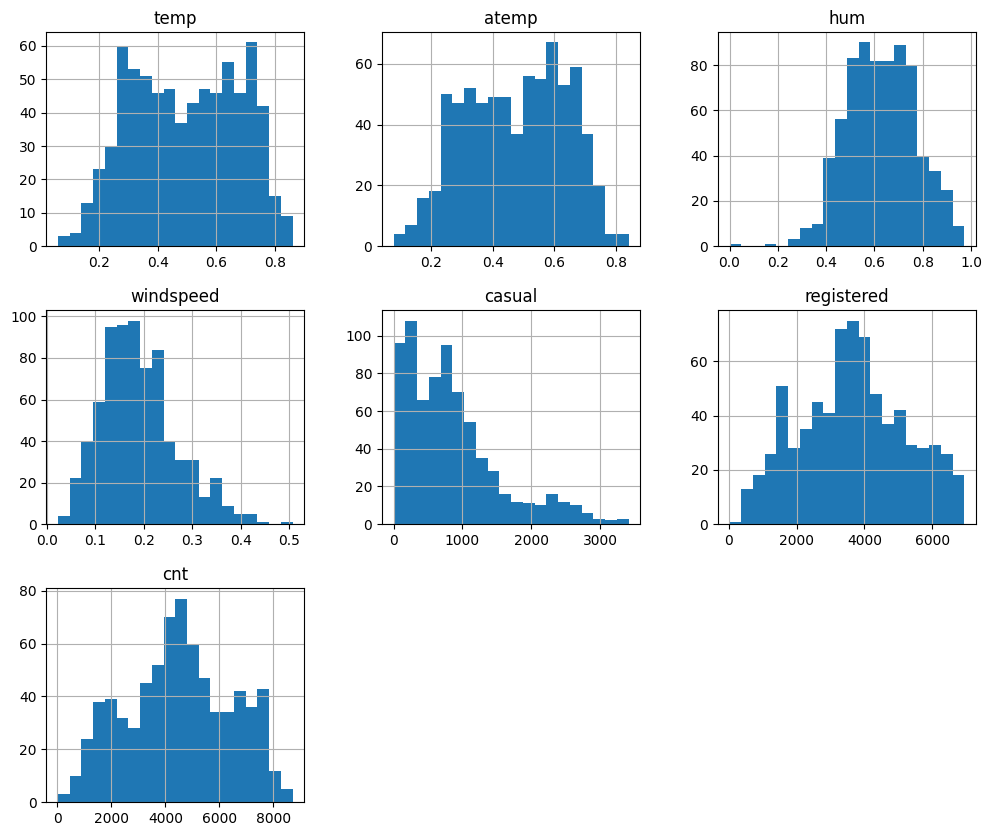

In [120]:
# Visualisasi Distribusi
numeric_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
day_df[numeric_vars].hist(bins=20, figsize=(12, 10))
plt.show()

### Explore data hour



#### Melihat sample 5 data dari hour

In [121]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8387,8388,2011-12-21,1,0,12,3,0,3,1,2,0.36,0.3788,0.71,0.0000,0,2,2
535,536,2011-01-24,1,0,1,11,0,1,1,1,0.10,0.1212,0.46,0.1343,3,43,46
3523,3524,2011-05-31,2,0,5,17,0,2,1,1,0.84,0.8030,0.53,0.2239,67,428,495
11448,11449,2012-04-27,2,1,4,5,0,5,1,1,0.42,0.4242,0.44,0.3582,0,19,19
14182,14183,2012-08-19,3,1,8,3,0,0,0,2,0.62,0.6061,0.61,0.1642,21,34,55


#### Mengeksplore parameter statistik dari data hour

In [122]:
hour_df.describe(include="all")

<ipython-input-122-55b8ff84265d>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


#### Mengeksplore distribusi jumlah pengguna sepeda dalam seminggu

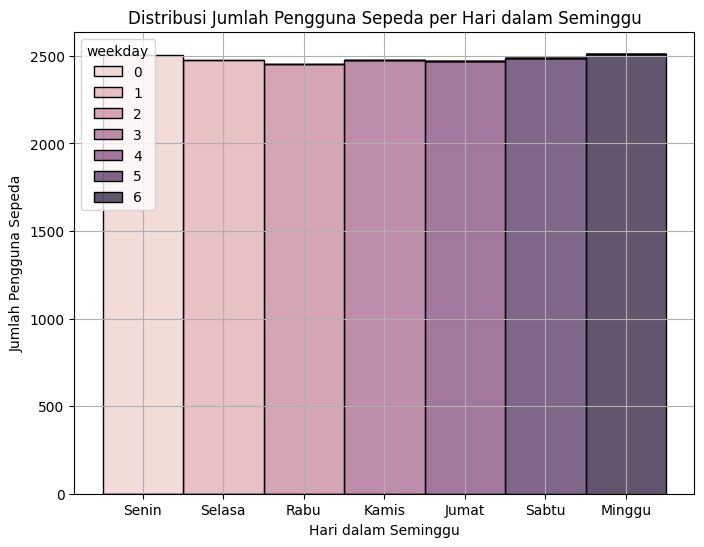

In [137]:
# Hitung total jumlah pengguna sepeda per hari dalam seminggu
daily_data = hour_df.groupby('weekday')['cnt'].sum()

# Visualisasikan distribusi jumlah pengguna sepeda per hari dalam seminggu menggunakan histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=hour_df, x='weekday', bins=7, discrete=True, hue='weekday', multiple='stack')
plt.title('Distribusi Jumlah Pengguna Sepeda per Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.grid(True)
plt.show()

#### Memeriksa kolom instant pada data hour unique atau tidak

In [123]:
hour_df.instant.is_unique

True

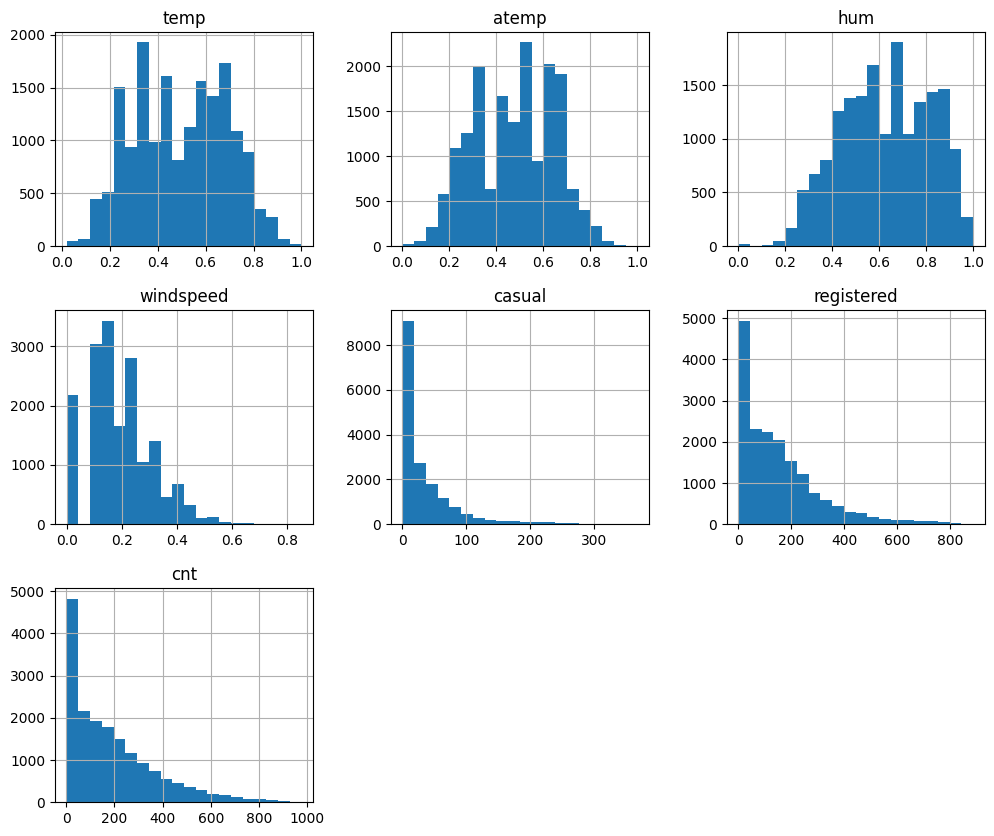

In [124]:
# Visualisasi distribusi untuk variabel numerik
hour_df[numeric_vars].hist(bins=20, figsize=(12, 10))
plt.show()

### Explore data day and hour


#### Merge data day dan hour

In [125]:
day_hour_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
day_hour_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6.0,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.0,0.0,2.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,1.0,1.0,1.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,2.0,1.0,1.0,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,3.0,1.0,1.0,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [126]:
day_hour_df.groupby(by="hum_y").instant.nunique().sort_values(ascending=False).head(10)

hum_y
0.613333    4
0.741250    3
0.630833    3
0.483333    3
0.722917    3
0.729583    3
0.552083    3
0.590000    3
0.590417    3
0.542500    3
Name: instant, dtype: int64

#### Memeriksa rentang tahun data day dan hour



In [129]:
day_hour_df['year'] = day_hour_df['dteday_x'].dt.year

# Menentukan rentang tahun
start_year = day_hour_df['year'].min()
end_year = day_hour_df['year'].max()

print("Rentang Tahun:", start_year, "-", end_year)

Rentang Tahun: 2011 - 2012


#### Mengeksplore korelasi antara suhu dan jumlah pengguna sepeda

In [135]:
# Hitung korelasi antara suhu dan jumlah pengguna sepeda
correlation = day_hour_df['temp_x'].corr(day_hour_df['cnt_y'])

print(f"Korelasi antara suhu dan jumlah pengguna sepeda: {correlation}")

Korelasi antara suhu dan jumlah pengguna sepeda: -0.36246259417344434


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada perbedaan pola dalam peminjaman sepeda antara hari kerja (workingday) dan hari libur (holiday)?


<ipython-input-130-93b6a4091f81>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-130-93b6a4091f81>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




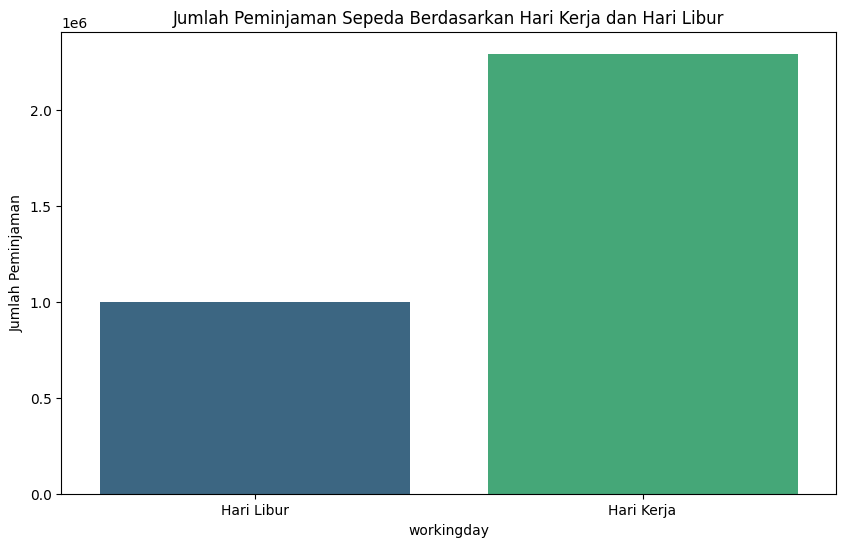

In [130]:
grouped = day_df.groupby('workingday').sum()[['casual', 'registered', 'cnt']].reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=grouped, palette='viridis')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Hari Kerja dan Hari Libur')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(ticks=[0, 1], labels=['Hari Libur', 'Hari Kerja'])
plt.show()

### Pertanyaan 2: Apakah cuaca memengaruhi jumlah peminjaman sepeda?


1.   List item
2.   List item



<ipython-input-131-dc0b0a0dd19c>:11: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-131-dc0b0a0dd19c>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




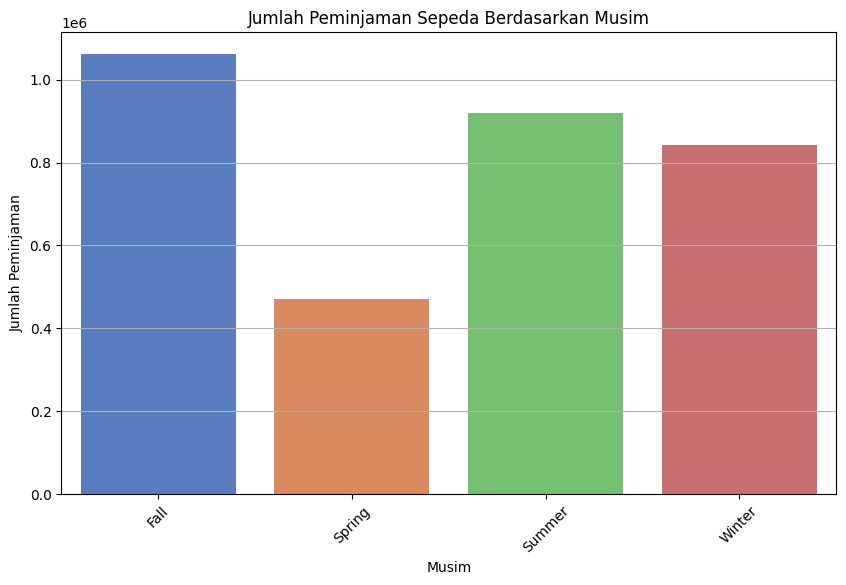

In [131]:
season_labels = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

day_df['season'] = day_df['season'].map(season_labels)

# Mengelompokkan data berdasarkan musim dan menghitung jumlah peminjaman
grouped_season = day_df.groupby('season').sum()['cnt'].reset_index()

# Membuat bar plot untuk membandingkan jumlah peminjaman pada setiap musim
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=grouped_season, palette='muted')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Pertanyaan 3: Bagaimana perbandingan rata-rata jumlah peminjaman sepeda antara pengguna casual dan pengguna terdaftar pada setiap hari kerja (Senin-Jumat)?


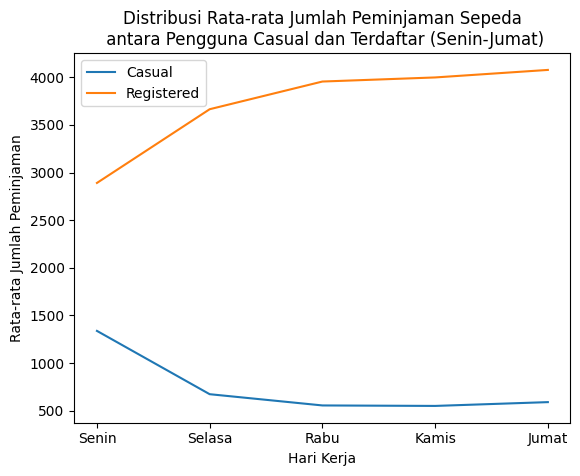

In [202]:
# Filter data untuk hari kerja
df_weekdays = day_df[(day_df['weekday'] >= 0) & (day_df['weekday'] <= 4)]

# Hitung rata-rata jumlah peminjaman casual dan registered untuk setiap hari kerja
average_casual = df_weekdays.groupby('weekday')['casual'].mean()
average_registered = df_weekdays.groupby('weekday')['registered'].mean()

# Buat label hari kerja
weekday_labels = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat']

# Buat visualisasi
plt.plot(weekday_labels, average_casual, label='Casual')
plt.plot(weekday_labels, average_registered, label='Registered')
plt.xlabel('Hari Kerja')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.title('Distribusi Rata-rata Jumlah Peminjaman Sepeda\n antara Pengguna Casual dan Terdaftar (Senin-Jumat)')
plt.legend()
plt.show()


## Conclusion

- Conclution pertanyaan 1
  - Dalam visual data itu kita dapat melihat perbedaan yang signifikan antara pola peminjaman sepeda pada hari kerja dan hari libur, terlihat jika lebih banyak peminjaman sepeda pada hari kerja
- Conclution pertanyaan 2
  - Pada visualisasi ini terlihat bahwa peminjaman sepeda paling banyak ada di musim gugur dilanjut musim summer lalu musim winter dan yang terakhir musim spring
- Conclution pertanyaan 3
  - Pada visualisasi ini terlihat bahwa jumlah peminjaman sepeda pada pengguna terdaftar(register user) lebih banyak pada hari kerja dari grafik kita bisa melihat bahwa register user selalu diatas 2500 peminjam dan peaknya ada di hari jumat, beda dengan casual user yang peaknya di hari senin dan hari lainnya menurun hingga jumat terjadi kenaikan walau tidak signifikan.